In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
n, d = 50, 1
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true

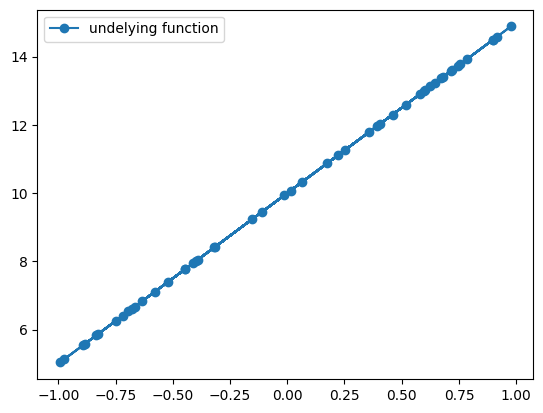

In [29]:
plt.plot(x, y_true, marker="o", label="undelying function")
plt.legend()
plt.show()

In [30]:
class Linear:
    def __init__(self, num_input, num_output=1):

        self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
        self.bias = np.zeros((1))

    def __call__(self, x):
        return x @ self.weights + self.bias

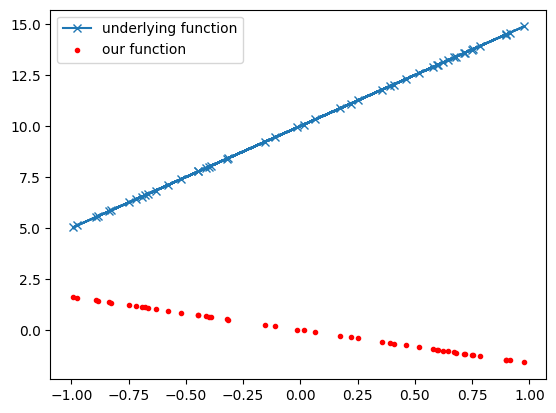

In [48]:
linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()
plt.show()

In [49]:
class MSE:
    def __call__(self, y_pred:np.ndarray, y_true:np.ndarray):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient

In [53]:
class Linear:
    def __init__(self, input_dim:int, num_hidden:int=1):
        self.weights = np.random.randn(input_dim, num_hidden) - 0.5
        self.bias = np.random.randn(1) - 0.5
    
    def __call__(self, x:np.ndarray):
        self.x = x
        output = x @ self.weights + self.bias

        return output

    #gradient is given from the loss function (MSE)
    def backward(self, gradient:np.ndarray):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum()
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient
    
    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [61]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

109.07205727133245
72.41894270262809


Epoch 0, loss 133.1336245360465
Epoch 5, loss 16.744618086100196
Epoch 10, loss 2.8950455611935384
Epoch 15, loss 0.7995337223014531
Epoch 20, loss 0.3032333665574885
Epoch 25, loss 0.1292295592082919
Epoch 30, loss 0.05686156989877575
Epoch 35, loss 0.025219250945207303
Epoch 40, loss 0.011206899913642201
Epoch 45, loss 0.00498243549513145
Epoch 50, loss 0.002215372731810793
Epoch 55, loss 0.000985062356461122


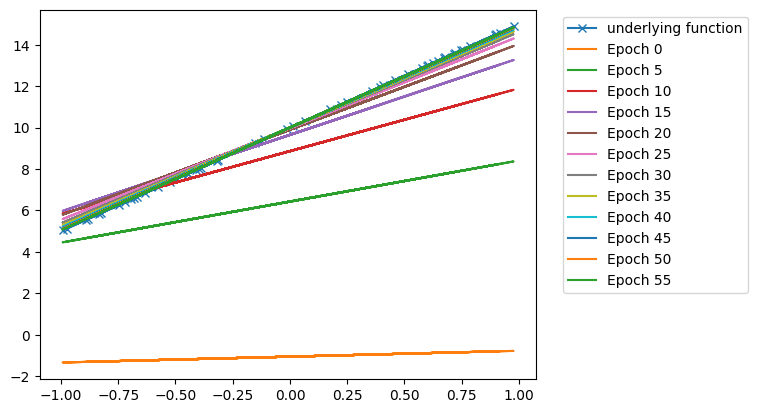

In [63]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
    y_pred = linear(x)
    loss_value = loss(y_pred, y_true)

    if epoch%5 == 0:
        print(f"Epoch {epoch}, loss {loss_value}")
        plt.plot(x, y_pred.squeeze(), label=f"Epoch {epoch}")
    
    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.show()

Epoch 0, loss 2.265173221111459
Epoch 1, loss 1.8696353884255583
Epoch 2, loss 1.5690014444566314
Epoch 3, loss 1.3342785009807667
Epoch 4, loss 1.146421424677376
Epoch 5, loss 0.9927695482654438
Epoch 6, loss 0.8647781515440282
Epoch 7, loss 0.7565720798416432
Epoch 8, loss 0.6640216433831635
Epoch 9, loss 0.5841505281168815
Epoch 10, loss 0.5147549598783655
Epoch 11, loss 0.45415745791575934
Epoch 12, loss 0.40104648728598036
Epoch 13, loss 0.3543710684057142
Epoch 14, loss 0.3132706654148626
Epoch 15, loss 0.2770278245449155
Epoch 16, loss 0.2450355735099901
Epoch 17, loss 0.2167744770505319
Epoch 18, loss 0.191796077253766
Epoch 19, loss 0.16971061396535572
Epoch 20, loss 0.15017766396501078
Epoch 21, loss 0.13289881206522375
Epoch 22, loss 0.11761177091049566
Epoch 23, loss 0.1040855611981477
Epoch 24, loss 0.09211648978986117
Epoch 25, loss 0.0815247448042997
Epoch 26, loss 0.07215148020206712
Epoch 27, loss 0.06385629772013
Epoch 28, loss 0.056515057726996186
Epoch 29, loss 0.05

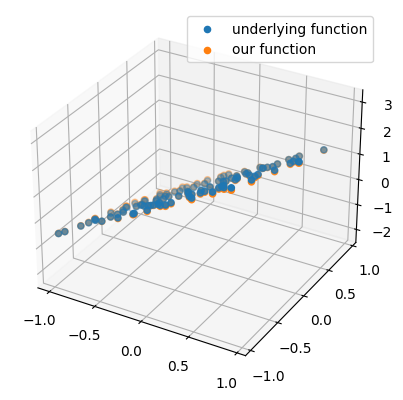

In [101]:
n, d = 100, 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, -1],]).T
bias_true = np.array([0.5])

y_true = x @ weights_true + bias_true

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1
##################################################
from typing import Callable

def plot_3d(x, y, y_pred=None):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
    plt.legend()


def fit(x:np.ndarray, y:np.ndarray, model:Callable, loss:Callable, lr:float, num_epochs:int):
    for epoch in range(num_epochs):
        y_pred = model(x)
        loss_value = loss(y_pred, y)
        print(f"Epoch {epoch}, loss {loss_value}")
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=lr, num_epochs=num_epochs)
plot_3d(x, y_true, linear(x))